In [14]:
import nest_asyncio
nest_asyncio.apply()
from IPython.display import JSON

import xarray as xr

from odp_s3 import odp, open_cached_dataset, CciChunkStore

In [3]:
#JSON(odp.dataset_names, root='dataset_names', expanded=False)

In [ ]:
#ds1 = open_cached_dataset('esacci.AEROSOL.day.L3C.AER_PRODUCTS.AATSR.Envisat.AATSR.v2-6.r1')
#ds1

In [4]:
ds2 = open_cached_dataset('esacci.OZONE.mon.L3.NP.multi-sensor.multi-platform.MERGED.fv0002.r1')
ds2

<xarray.Dataset>
Dimensions:           (air_pressure: 17, bnds: 2, lat: 180, layers: 16, lon: 360, time: 144)
Coordinates:
  * air_pressure      (air_pressure) float32 1013.0 446.05 196.35 ... 0.05 0.01
  * lat               (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * layers            (layers) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * lon               (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time              (time) datetime64[ns] 1997-01-16T12:00:00 ... 2008-12-16T12:00:00
    time_bnds         (time, bnds) datetime64[ns] dask.array<chunksize=(144, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    O3_du             (time, layers, lat, lon) float32 dask.array<chunksize=(1, 16, 180, 360), meta=np.ndarray>
    O3_du_tot         (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    O3_ndens          (time, air_pressure, lat, lon) float32 dask.array<chunksize=(1, 17, 180, 360), meta=np.ndarray>
    O3_vmr            (time, air_pressure, lat, lon) float32 dask.array<chunksize=(1, 17, 180, 360), meta=np.ndarray>
    O3e_du            (time, layers, lat, lon) float32 dask.array<chunksize=(1, 16, 180, 360), meta=np.ndarray>
    O3e_du_tot        (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    O3e_ndens         (time, air_pressure, lat, lon) float32 dask.array<chunksize=(1, 17, 180, 360), meta=np.ndarray>
    O3e_vmr           (time, air_pressure, lat, lon) float32 dask.array<chunksize=(1, 17, 180, 360), meta=np.ndarray>
    surface_pressure  (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.OZONE.mon.L3.NP.multi-sensor.multi-platfo...
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...
    date_created:            2020-09-17T11:14:27.179607
    processing_level:        L3
    time_coverage_start:     1997-01-01T00:00:00
    time_coverage_end:       2009-01-01T00:00:00
    time_coverage_duration:  P4383DT0H0M0S

In [11]:
%timeit -n1 -r1 ds2.O3_du_tot.sel(lat=50.0, lon=0.0, method='nearest').load()

1min 57s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


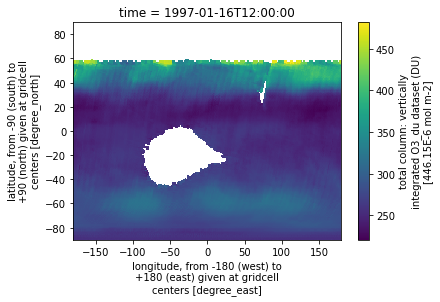

In [6]:
ds2.O3_du_tot.isel(time=0).plot()

In [ ]:
ds2.O3_du_tot.plot(x="lon", y="lat", col="time", col_wrap=3)

In [ ]:
ds2.O3_du_tot.plot(x="lon", y="lat", col="time", col_wrap=3)

In [16]:
ds3 = xr.open_zarr(CciChunkStore(odp, 'esacci.OZONE.mon.L3.NP.multi-sensor.multi-platform.MERGED.fv0002.r1'))

In [17]:
%timeit -n1 -r1 ds3.O3_du_tot.sel(lat=50.0, lon=0.0, method='nearest').load()

26.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
